<a href="https://colab.research.google.com/github/DanielaPortilloMercado/Inteligencia-Artificial/blob/main/PRACTICAS/Practica1/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRACTICA #1
 NOMBRE: Daniela Portillo Mercado

 CARRERA: Ingenieria de Sistemas

 enlace de git hub:

 enlace de colab:
 https://colab.research.google.com/drive/120r3zFSstIfk1nL4grtcrCqJbPEpkuYv#scrollTo=Y4eMlJcMvPJz



# Ejercicio de programación -  Regresión Logistica
En este ejercicio se implementa regresión logistica.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# 1 Regresion Logistica
En esta parte del ejercicio, creará un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Suponga que es el administrador de un departamento universitario y desea determinar las posibilidades de admisión de cada solicitante en función de sus resultados en dos exámenes. Tiene datos históricos de solicitantes anteriores que puede usar como un conjunto de capacitación para la regresión logística. Para cada ejemplo de capacitación, se tiene las calificaciones del solicitante en dos exámenes y la decisión de admisión. Su tarea es crear un modelo de clasificación que calcule la probabilidad de admisión de un solicitante en función de los puntajes de esos dos exámenes.

La siguiente celda cargará los datos y las etiquetas correspondientes:

# Datos del dataset
En la siguiente tabla impresa se puede ver lo siguiente:

Variables de entrada(X):

PA alta 1-0

col alta 1-0

control de col 1-0

IMC (valor)

fumador 1-0

accidente cerebrovascular 1-0

enfermedad cardíaca 1-0

actividad física 1-0

frutas 1-0

verduras 1-0

alto consumo de alcohol 1-0

cualquier atención médica 1-0

sin costo Docbc 1-0

salud general 1-0

salud mental 1-0

salud física 1-0

caminata diferencial 1-0

sexo 1-0

edad (valor)

educación

ingresos

Variable de salida (y):

(Diabetes).- Presencia o ausencia de enfermedad, donde: 1:Si y 2:No.

In [40]:
#Haciendo uso de la libreria pandas para leer el dataset.
dataset = pd.read_csv('/content/drive/MyDrive/diabetes-practica.csv', delimiter=',')

#Imprimimos en una tabla el dataset.
dataset

,PA alta,col alta,control de col,IMC,fumador,acc. cerebrovascular,enfermedad cardíaca,actividad física,frutas,verduras,...,Falta de atencion por Dinero,salud general,salud mental,salud física,caminata,sexo,edad,educación,ingresos,Diabetes
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,14.0,0.0,0.0,12.0,5.0,5.0,0.0
24996,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,1.0,4.0,5.0,0.0
24997,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,6.0,0.0
24998,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,1.0,0.0,1.0,8.0,6.0,8.0,0.0


# Separamos los datos
Separamos los datos donde el 80% de los datos del dataset seran para el entrenamiento del modelo, mientras que el 20% restante del dataset sera usando para hacer las pruebas y validaciones correspondientes.

In [41]:
# Separar el conjunto de datos en conjuntos de entrenamiento y prueba
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Separar los conjuntos de características (X) y las etiquetas (y) para el conjunto de prueba
X_test = test_dataset.drop(['Diabetes'], axis=1).values
y_test = test_dataset['Diabetes'].values

# Separar los conjuntos de características (X) y las etiquetas (y) para el conjunto de entrenamiento
X_train = train_dataset.drop(['Diabetes'], axis=1).values
y_train = train_dataset['Diabetes'].values

# Calcular el número de ejemplos de entrenamiento
m_train = len(y_train)

# Imprimir algunos ejemplos de los datos de entrenamiento
print('{:>8s}{:>8s}{:>14s}{:>8s}{:>8s}{:>18s}{:>20s}{:>16s}{:>8s}{:>8s}{:>10s}{:>12s}{:>18s}{:>14s}{:>12s}{:>10s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>10s}'.format(
    'PA alta', 'col alta', 'control de col', 'IMC', 'fumador', 'acc. cerebrovascular', 'enfermedad cardíaca', 'actividad física', 'frutas', 'verduras', 'alcohol', 'atencion medica', 'Falta de atencion por Dinero', 'salud general', 'salud mental', 'salud física', 'caminata', 'sexo', 'edad', 'educación', 'ingresos', 'Y'
))

print('-' * 280)


for i in range(10):
    print('{:8.0f}{:8.0f}{:14.0f}{:8.0f}{:8.0f}{:18.0f}{:20.0f}{:16.0f}{:8.0f}{:8.0f}{:10.0f}{:12.0f}{:18.0f}{:14.0f}{:12.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:10.0f}'.format(
        X_train[i, 0], X_train[i, 1], X_train[i, 2], X_train[i, 3], X_train[i, 4], X_train[i, 5], X_train[i, 6], X_train[i, 7], X_train[i, 8], X_train[i, 9], X_train[i, 10], X_train[i, 11], X_train[i, 12], X_train[i, 13], X_train[i, 14], X_train[i, 15], X_train[i, 16], X_train[i, 17], X_train[i, 18], X_train[i, 19], X_train[i, 20], y_train[i]
    ))

# Imprimir la cantidad de ejemplos de entrenamiento y prueba
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format(len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format(len(test_dataset)))

 PA altacol altacontrol de col     IMC fumadoracc. cerebrovascular enfermedad cardíacaactividad física  frutasverduras   alcoholatencion medicaFalta de atencion por Dinero salud generalsalud mentalsalud física  caminata      sexo      edadeducacióningresos         Y
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       0       0             1      25       0                 0                   0               1       1       1         0           1                 0             1           0         1         0         0         8       6       8         0
       0       0             1      29       1                 0                   0               1       1       0         1           1                 0             2          30        30         0 

# Normalización de caracteristicas
Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. Se aplica la normalizacion esto debido a que los datos de las X estan a diferentes escalas.

Hacemos el uso de la siguiente funcion para normalizar los datos de las columnas X:

In [42]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [43]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)
# imprimir todos las X_norm de datos solo 20
print('{:>8s}{:>8s}{:>14s}{:>8s}{:>8s}{:>18s}{:>20s}{:>16s}{:>8s}{:>8s}{:>10s}{:>12s}{:>18s}{:>14s}{:>12s}{:>10s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}'.format(
    'PA alta', 'col alta', 'control de col', 'IMC', 'fumador', 'acc. cerebrovascular', 'enfermedad cardíaca', 'actividad física', 'frutas', 'verduras', 'alcohol', 'atencion medica', 'Falta de atencion por Dinero', 'salud general', 'salud mental', 'salud física', 'caminata', 'sexo', 'edad', 'educación', 'ingresos'
))

print('-' * 280)


for i in range(20):
    print('{:8.0f}{:8.0f}{:14.0f}{:8.0f}{:8.0f}{:18.0f}{:20.0f}{:16.0f}{:8.0f}{:8.0f}{:10.0f}{:12.0f}{:18.0f}{:14.0f}{:12.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11], X_norm[i, 12], X_norm[i, 13], X_norm[i, 14], X_norm[i, 15], X_norm[i, 16], X_norm[i, 17], X_norm[i, 18], X_norm[i, 19], X_norm[i, 20]
    ))

 PA altacol altacontrol de col     IMC fumadoracc. cerebrovascular enfermedad cardíacaactividad física  frutasverduras   alcoholatencion medicaFalta de atencion por Dinero salud generalsalud mentalsalud física  caminata      sexo      edadeducacióningresos
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
      -1      -1             0      -0      -1                -0                  -0               1       1       0        -0           0                -0            -1          -0        -0        -0        -1         0       1       1
      -1      -1             0       0       1                -0                  -0               1       1      -2         4           0                -0            -0           4         3        -0         1         0 

Añadimos una columan de unos a la matriz de X_norm, esto para hacer complemento a Theta cero:

In [44]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)
# print(len(X_ready[0]))
# imprimir todos las X_ready de datos solo 20
print('{:>8s}{:>8s}{:>14s}{:>8s}{:>8s}{:>18s}{:>20s}{:>16s}{:>8s}{:>8s}{:>10s}{:>12s}{:>18s}{:>14s}{:>12s}{:>10s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}'.format(
    'X(0)','PA alta', 'col alta', 'control de col', 'IMC', 'fumador', 'acc. cerebrovascular', 'enfermedad cardíaca', 'actividad física', 'frutas', 'verduras', 'alcohol', 'atencion medica', 'Falta de atencion por Dinero', 'salud general', 'salud mental', 'salud física', 'caminata', 'sexo', 'edad', 'educación', 'ingresos'
))

print('-' * 280)


for i in range(10):
    print('{:8.0f}{:8.0f}{:14.0f}{:8.0f}{:8.0f}{:18.0f}{:20.0f}{:16.0f}{:8.0f}{:8.0f}{:10.0f}{:12.0f}{:18.0f}{:14.0f}{:12.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11], X_ready[i, 12], X_ready[i, 13], X_ready[i, 14], X_ready[i, 15], X_ready[i, 16], X_ready[i, 17], X_ready[i, 18], X_ready[i, 19], X_ready[i, 20],X_ready[i, 21]
    ))

    X(0) PA alta      col altacontrol de col     IMC           fumadoracc. cerebrovascularenfermedad cardíacaactividad física  frutas  verduras     alcohol   atencion medicaFalta de atencion por Dinerosalud generalsalud mentalsalud física  caminata      sexo    edadeducación
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       1      -1            -1       0      -0                -1                  -0              -0       1       1         0          -0                 0            -0          -1        -0        -0        -0        -1       0       1
       1      -1            -1       0       0                 1                  -0              -0       1       1        -2           4                 0            -0          -0         4         3  

Fución Sigmoidea
La hipotesis para la regresión logistica se define como:

hθ(x)=g(θTx)

donde la función  g  is la función sigmoidea. La función sigmoidea se define como:

g(z)=11+e−z
.

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de x, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de sigmoid(0) debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

También conocida como la función logística, es una función matemática que toma cualquier número real como entrada y devuelve un valor en el rango de 0 a 1. Donde nuestra Z es nuestra hipotesis.

In [45]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g


In [47]:
# Prueba la implementacion de la funcion sigmoid
z = [-100, 0.5, 1000000]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [-100, 0.5, 1000000] ) =  [3.72007598e-44 6.22459331e-01 1.00000000e+00]


# Función de Costo y Gradiente
Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [48]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

escenso por el gradiente
El costo  J(θ)  esta parametrizado por el vector  θ , no  X  y  y . Donde hay que minimizar el valor de  J(θ)  cambiando los valores del vector  θ . Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de  J(θ)  y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico. haciendo uso de la sigmoid()

In [54]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-1.52005431  0.21900716  0.16271642  0.07237035  0.24142071  0.00378332
  0.03643948  0.08435072 -0.01193848 -0.0084071  -0.02099523 -0.08075769
  0.01701188 -0.00520699  0.24709722 -0.01507086  0.02363389  0.07670331
  0.05044359  0.1655729  -0.05278787 -0.08544109]
########################################################################################################
Con un costo de: 0.352810


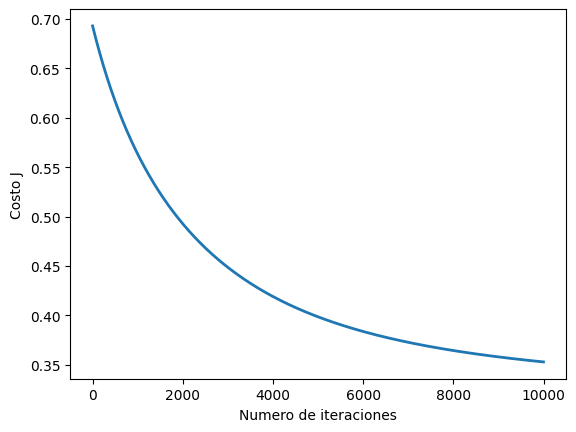

In [56]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(22)
theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#mostramos el ultimo costo, este seria el mejor costo
print("########################################################################################################")
print('Con un costo de: {:.6f}'.format(J_history[-1]))


In [57]:
X_array = [1,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0]
X_array_copy = X_array.copy()
#Se normaliza las caracteristicas para la prueba. haciendo el uso de mu y sigma calculados anteriormente, solamente los valores despues del primero, porque este es el 1.
X_array[1:] = (X_array[1:] - mu) / sigma

resultados = sigmoid(np.dot(X_array, theta))

print(f"Una persona con las caracteristicas: {X_array_copy} ")
print(f'Tiene una probabilidad de tener diabetes de: {resultados * 100} %')


Una persona con las caracteristicas: [1, 1.0, 1.0, 1.0, 40.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 5.0, 18.0, 15.0, 1.0, 0.0, 9.0, 4.0, 3.0] 
Tiene una probabilidad de tener diabetes de: 58.18577930209623 %


In [58]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

# PREDICCION
Se creo una matriz con 15 ejemplos, donde se hace las predicciones correspondientes:

Definiendo nuestro umbral clasificador
Donde:

Si  h(θ)  >= 0.5, predice "y = 1".
Si  h(θ)  < 0.5 , predice "y = 0".

In [60]:
nombres_columnas = ['PA alta', 'col alta', 'control de col', 'IMC', 'fumador', 'acc. cerebrovascular', 'enfermedad cardíaca', 'actividad física', 'frutas', 'verduras', 'alcohol', 'atencion medica', 'Falta de atencion por Dinero', 'salud general', 'salud mental', 'salud física', 'caminata', 'sexo', 'edad', 'educación', 'ingresos', 'Diabetes(%)', 'Diabetes(si/no)' ]

matriz_datos = np.array([
[0.0,0.0,1.0,39.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,5.0,5.0,0.0,1.0,3.0,6.0,4.0],
[1.0,1.0,1.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,11.0,5.0,8.0],
[1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0],
[0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,7.0],
[1.0,1.0,1.0,24.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,12.0,5.0,7.0],
[0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,30.0,1.0,0.0,7.0,6.0,7.0],
[1.0,1.0,1.0,34.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,8.0],
[1.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,5.0,4.0,2.0],
[0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,7.0],
[0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,5.0,0.0,28.0,0.0,0.0,12.0,4.0,1.0],
[1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,7.0],
[0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,2.0,3.0],
[1.0,1.0,1.0,29.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,30.0,1.0,0.0,8.0,5.0,1.0],
[1.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,9.0,6.0,7.0],
[0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0],
])

para_tabla = matriz_datos.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre = []

matriz_datos = (matriz_datos- mu) / sigma
matriz_datos = np.concatenate([np.ones((len(matriz_datos), 1)), matriz_datos], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos:
    y_pre.append(sigmoid(np.dot(j, theta)))

# Convertimos la lista a un array unidimensional

y_pre = np.array(y_pre)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral = (y_pre >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre))
para_tabla = np.column_stack((para_tabla, y_pre_umbral))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))


+-----------+------------+------------------+-------+-----------+------------------------+-----------------------+--------------------+----------+------------+-----------+-------------------+--------------------------------+-----------------+----------------+----------------+------------+--------+--------+-------------+------------+---------------+-------------------+
|   PA alta |   col alta |   control de col |   IMC |   fumador |   acc. cerebrovascular |   enfermedad cardíaca |   actividad física |   frutas |   verduras |   alcohol |   atencion medica |   Falta de atencion por Dinero |   salud general |   salud mental |   salud física |   caminata |   sexo |   edad |   educación |   ingresos |   Diabetes(%) |   Diabetes(si/no) |
+===========+============+==================+=======+===========+========================+=======================+====================+==========+============+===========+===================+================================+=================+================

# Hacemos la validación
Para hacer las validaciones correspondientes se hizo el uso siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [61]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)

In [62]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)

# imprimir todos las X_test_ready de datos solo 10
print('{:>8s}{:>8s}{:>14s}{:>8s}{:>8s}{:>18s}{:>20s}{:>16s}{:>8s}{:>8s}{:>10s}{:>12s}{:>18s}{:>14s}{:>12s}{:>10s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}'.format(
    'X(0)','PA alta', 'col alta', 'control de col', 'IMC', 'fumador', 'acc. cerebrovascular', 'enfermedad cardíaca', 'actividad física', 'frutas', 'verduras', 'alcohol', 'atencion medica', 'Falta de atencion por Dinero', 'salud general', 'salud mental', 'salud física', 'caminata', 'sexo', 'edad', 'educación', 'ingresos'
))

print('-' * 280)


for i in range(10):
    print('{:8.0f}{:8.0f}{:14.0f}{:8.0f}{:8.0f}{:18.0f}{:20.0f}{:16.0f}{:8.0f}{:8.0f}{:10.0f}{:12.0f}{:18.0f}{:14.0f}{:12.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6], X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], X_test_ready[i, 12], X_test_ready[i, 13], X_test_ready[i, 14], X_test_ready[i, 15], X_test_ready[i, 16], X_test_ready[i, 17], X_test_ready[i, 18], X_test_ready[i, 19], X_test_ready[i, 20],X_test_ready[i, 21]
    ))

    X(0) PA alta      col altacontrol de col     IMC           fumadoracc. cerebrovascularenfermedad cardíacaactividad física  frutas  verduras     alcohol   atencion medicaFalta de atencion por Dinerosalud generalsalud mentalsalud física  caminata      sexo    edadeducación
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       1       1            -1       0      -0                 1                  -0              -0       1       1         0          -0                 0            -0           0        -0         1         2         1       1      -1
       1      -1            -1       0       1                -1                  -0              -0       1       1         0          -0                 0            -0          -0         0        -1  

Calculo de Y predicha

In [63]:
y_predicha =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready:
    y_predicha.append(sigmoid(np.dot(dato, theta)))

# Convertimos la lista a un array unidimensional
y_predicha = np.array(y_predicha)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral = (y_predicha >= 0.5).astype(int)

# imprimir todos las X_test_ready de datos solo 10
print('{:>8s}{:>8s}{:>14s}{:>8s}{:>8s}{:>18s}{:>20s}{:>16s}{:>8s}{:>8s}{:>10s}{:>12s}{:>18s}{:>14s}{:>12s}{:>10s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}'.format(
    'X(0)','PA alta', 'col alta', 'control de col', 'IMC', 'fumador', 'acc. cerebrovascular', 'enfermedad cardíaca', 'actividad física', 'frutas', 'verduras', 'alcohol', 'atencion medica', 'Falta de atencion por Dinero', 'salud general', 'salud mental', 'salud física', 'caminata', 'sexo', 'edad', 'educación', 'ingresos', 'Y', 'Umbral(Y)'
))


print('-' * 280)

for i in range(1, 11):  # Comenzar desde 1 para omitir el índice X(0)
    print('{:8.0f}{:8.0f}{:14.0f}{:8.0f}{:8.0f}{:18.0f}{:20.0f}{:16.0f}{:8.0f}{:8.0f}{:10.0f}{:12.0f}{:18.0f}{:14.0f}{:12.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6], X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], X_test_ready[i, 12], X_test_ready[i, 13], X_test_ready[i, 14], X_test_ready[i, 15], X_test_ready[i, 16], X_test_ready[i, 17], X_test_ready[i, 18], X_test_ready[i, 19], X_test_ready[i, 20], y_predicha[i], y_umbral[i]
    ))

    X(0) PA alta      col altacontrol de col     IMC           fumadoracc. cerebrovascularenfermedad cardíacaactividad física  frutas  verduras     alcohol   atencion medicaFalta de atencion por Dinerosalud generalsalud mentalsalud física  caminata      sexo    edadeducacióningresos       Y
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       1      -1            -1       0       1                -1                  -0              -0       1       1         0          -0                 0            -0          -0         0        -1        -0         1      -0       1       0       0
       1       1            -1       0      -0                 1                  -0              -0      -2      -1        -2           4                 0            -0  

# Calculando la precision del entrenamiento:
se hace uso del np.mean, Calcula la media (promedio) de los valores booleanos. Dado que True se interpreta como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de elementos iguales en y_predicha e y_test.

In [64]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 86.78 %
